In [1]:
import json

In [2]:
import matplotlib.pyplot as plt

In [3]:
path1 = '/home/haleh/repos/ECS260/detect-gpt/results/gpt2-medium-t5-large-temp/2026-02-12-17-00-56-760202-fp32-0.3-1-commits_gpt2-500/perturbation_1_d_results.json'
path2 = '/home/haleh/repos/ECS260/detect-gpt/results/gpt2-medium-t5-large-temp/2026-02-12-17-00-56-760202-fp32-0.3-1-commits_gpt2-500/perturbation_1_z_results.json'
path3 = '/home/haleh/repos/ECS260/detect-gpt/results/gpt2-medium-t5-large-temp/2026-02-12-17-00-56-760202-fp32-0.3-1-commits_gpt2-500/perturbation_10_d_results.json'
path4 = '/home/haleh/repos/ECS260/detect-gpt/results/gpt2-medium-t5-large-temp/2026-02-12-17-00-56-760202-fp32-0.3-1-commits_gpt2-500/perturbation_10_z_results.json'

In [4]:
def loadJson(path):
    with open(path) as f:
        data = json.load(f)
    return data

In [6]:
data1 = loadJson(path1)
data2 = loadJson(path2)
data3 = loadJson(path3)
data4 = loadJson(path4)

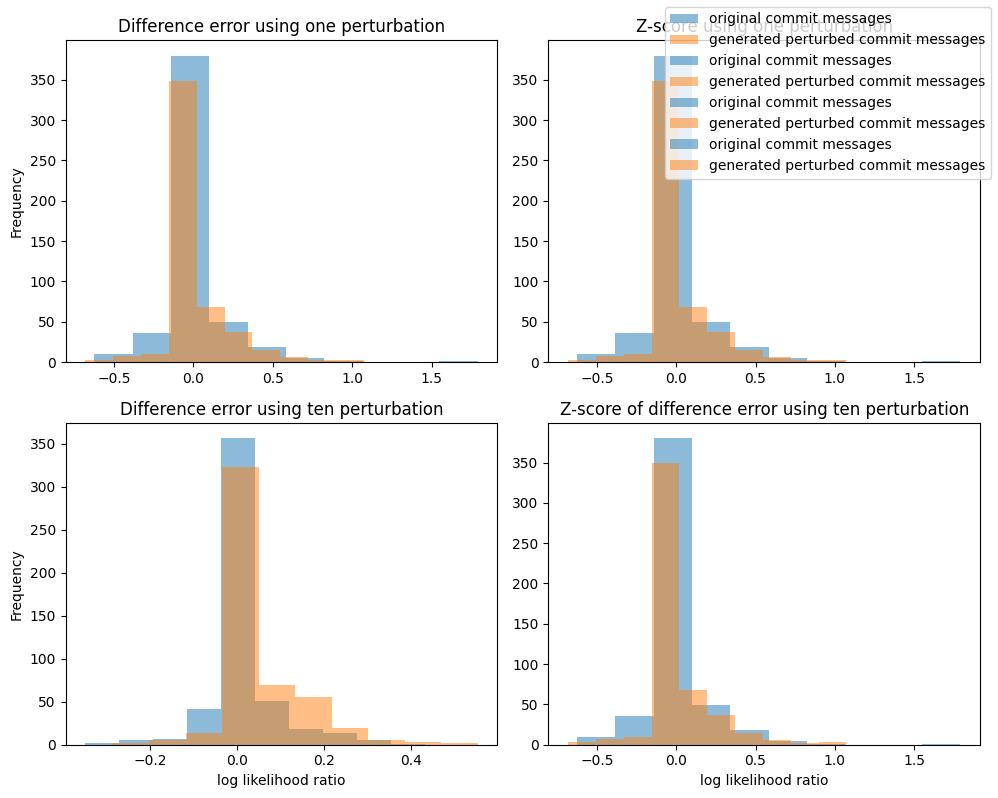

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
ax[0,0].hist(data1['predictions']['real'], bins=10, alpha=0.5 ,label='original commit messages')
ax[0,0].hist(data1['predictions']['samples'], bins=10, alpha=0.5 ,label='generated perturbed commit messages')
ax[0,0].set_title('Difference error using one perturbation')
ax[0,0].set_ylabel('Frequency')
ax[0,1].hist(data2['predictions']['real'], bins=10, alpha=0.5 ,label='original commit messages')
ax[0,1].hist(data2['predictions']['samples'], bins=10, alpha=0.5 ,label='generated perturbed commit messages')
ax[0,1].set_title('Z-score using one perturbation')
ax[1,0].hist(data3['predictions']['real'], bins=10, alpha=0.5 ,label='original commit messages')
ax[1,0].hist(data3['predictions']['samples'], bins=10, alpha=0.5 ,label='generated perturbed commit messages')
ax[1,0].set_title('Difference error using ten perturbation')
ax[1,0].set_ylabel('Frequency')

ax[1,0].set_xlabel('log likelihood ratio')
ax[1,1].hist(data2['predictions']['real'], bins=10, alpha=0.5 ,label='original commit messages')
ax[1,1].hist(data2['predictions']['samples'], bins=10, alpha=0.5 ,label='generated perturbed commit messages')
ax[1,1].set_title('Z-score of difference error using ten perturbation')
ax[1,1].set_xlabel('log likelihood ratio')
fig.tight_layout()
fig.legend()
fig.savefig('histogram.pdf')